In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import numpy as np

## Step 1 - load in data

In [3]:
df = pd.read_csv('Clean_Model_Ready.csv') #this data came from Kaggle - https://www.kaggle.com/datasets/omikumarmakadia2121/football-match-winners
                                          #note this dataset contains data from 2020 onwards

In [4]:
display(df)

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
0,1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,...,1.0,0.0,0.0,2022,Manchester City,0,18,16,6,0
1,2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,...,1.0,0.0,0.0,2022,Manchester City,1,15,15,5,1
2,3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,...,0.0,0.0,0.0,2022,Manchester City,1,0,12,5,1
3,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,...,0.0,0.0,0.0,2022,Manchester City,0,10,15,5,1
4,6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,...,1.0,0.0,0.0,2022,Manchester City,1,17,15,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,...,0.0,0.0,0.0,2021,Sheffield United,0,18,19,6,0
1385,39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,...,1.0,0.0,0.0,2021,Sheffield United,1,6,15,5,0
1386,40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,...,0.0,0.0,0.0,2021,Sheffield United,0,7,19,6,1
1387,41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,...,1.0,0.0,0.0,2021,Sheffield United,0,14,18,2,0


In [5]:
df.gf = df.gf.astype(int) 

## Step 2 - Build the model 

In [6]:
logreg = LogisticRegression()
X = df[['gf']] 
y = df['target']

In [7]:
logreg.fit(X,y)

LogisticRegression()

## Step 3 - Interpret the model 

In [9]:


intercept = logreg.intercept_[0]
print(intercept) 
gradient = logreg.coef_[0]
print(gradient) 

-3.0736441368858722
[1.8345234]


In [11]:
tipping_point = -intercept/gradient
print(tipping_point)

#a team needs to score 1.67 goals to make chances of winning game greater than not winning

[1.67544559]


## Step 4 - plot logistic regression

C:\Users\Chris Butler\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


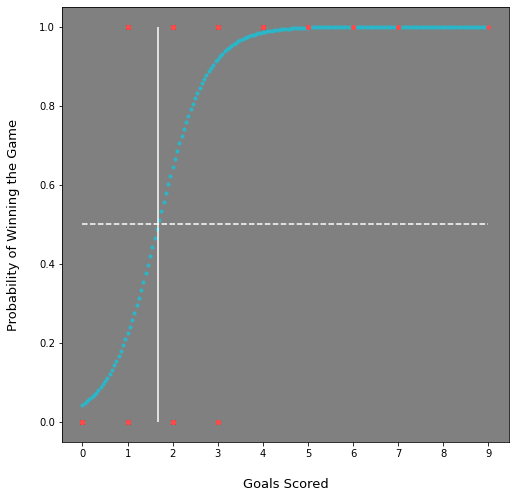

In [29]:

z = np.arange(min(df.gf), max(df.gf), 0.05) 

# Run each value from z through function to find probability of assigning label 0 (target not met) and 1 (target met)
probs = logreg.predict_proba(pd.DataFrame(z))

# Extract the probabilities for assigning label 1
phi_z = probs[:, 1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(z, phi_z, '.', color = "#2ab7ca") 
ax.plot(df.gf, df.target, '.', color = "#fe4a49", markersize = 7) 
ax.vlines(tipping_point, ymin=0, ymax=1, color='white')
ax.hlines(0.5, xmin=min(df.gf), xmax=max(df.gf), color='white', linestyles= 'dashed')
ax.set_xticks(np.arange(0, 10, 1)) 
plt.xlabel('\nGoals Scored', fontsize = 13)
plt.ylabel('Probability of Winning the Game\n', fontsize = 13)
ax.set_facecolor('grey')
plt.show()

## Step 5 - Validate model

In [47]:
logreg.score(X, y) #model is correct 82% of the time. This is pretty good! It means using goals scored and our model, we can now predict the outcome of a football match correctly 82% of the time

0.8214542836573074

In [48]:
#its a good idea to benchmark how good our model accuracy is, by stating what would be the outcome of just 'guessing' the outcome of a match with no predictor variables

df.target.value_counts(normalize=True).max() #if we were to just guess - best outcome would be 62%, so out model is a substantial improvement on this

0.6213102951763859

In [53]:
import statsmodels.api as sm

# Add a constant term to the predictor variables (intercept)
X = sm.add_constant(X)

# Create and fit a logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary which includes p-values
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.393305
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 1389
Model:                          Logit   Df Residuals:                     1387
Method:                           MLE   Df Model:                            1
Date:                Fri, 01 Sep 2023   Pseudo R-squ.:                  0.4072
Time:                        13:52:34   Log-Likelihood:                -546.30
converged:                       True   LL-Null:                       -921.49
Covariance Type:            nonrobust   LLR p-value:                3.324e-165
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0986      0.159    -19.499      0.000      -3.410      -2.787
gf             1.8521      0.